Integral over [0, ∞) = 1.00000000000000


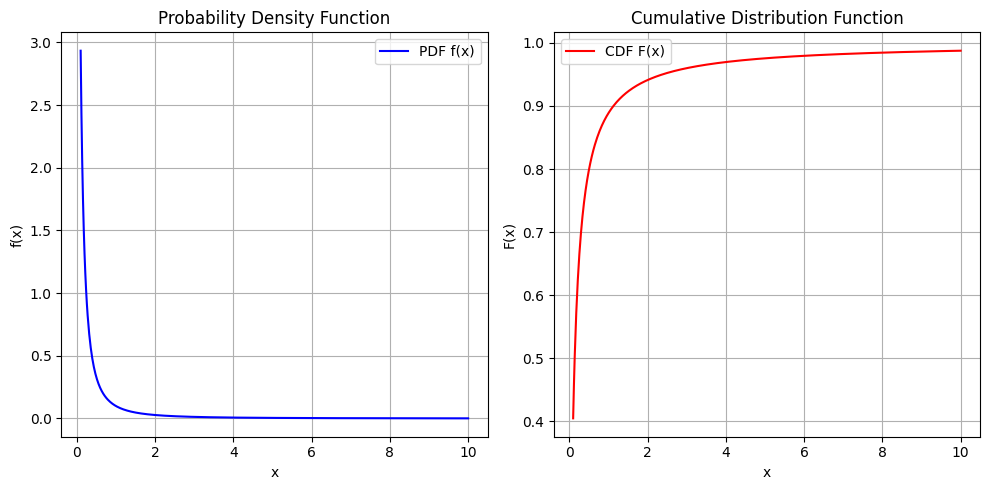

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define variables
x = sp.symbols('x', positive=True)
alpha, beta, p = 0.5, 0.5, 0.5

# Define the function f(x)
f_expr = alpha*beta*x**(-2) * (1 + beta*x**(-1))**(alpha-1) \
         * sp.exp(1 - (1 + beta*x**(-1))**alpha) \
         * (1 - 2*p + p*(1 + beta*x**(-1))**alpha)

# Check normalization: integrate from 0 to infinity
integral_val = sp.integrate(f_expr, (x, 0, sp.oo))
print("Integral over [0, ∞) =", integral_val.evalf())

# Define CDF: integrate from 0 to x
F_expr = sp.integrate(f_expr, (x, 0, x))

# Lambdify for numerical evaluation
f_num = sp.lambdify(x, f_expr, 'numpy')
F_num = sp.lambdify(x, F_expr, 'numpy')

# Numerical range
x_vals = np.linspace(0.1, 10, 500)
f_vals = f_num(x_vals)
F_vals = F_num(x_vals)

# Plot
plt.figure(figsize=(10,5))

# Plot PDF
plt.subplot(1,2,1)
plt.plot(x_vals, f_vals, label="PDF f(x)", color="blue")
plt.title("Probability Density Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()

# Plot CDF
plt.subplot(1,2,2)
plt.plot(x_vals, F_vals, label="CDF F(x)", color="red")
plt.title("Cumulative Distribution Function")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Integral of f(x) over [0, ∞) = -1.0
F(0+) = 1
F(∞) = 0
F(∞) - F(0+) = -1


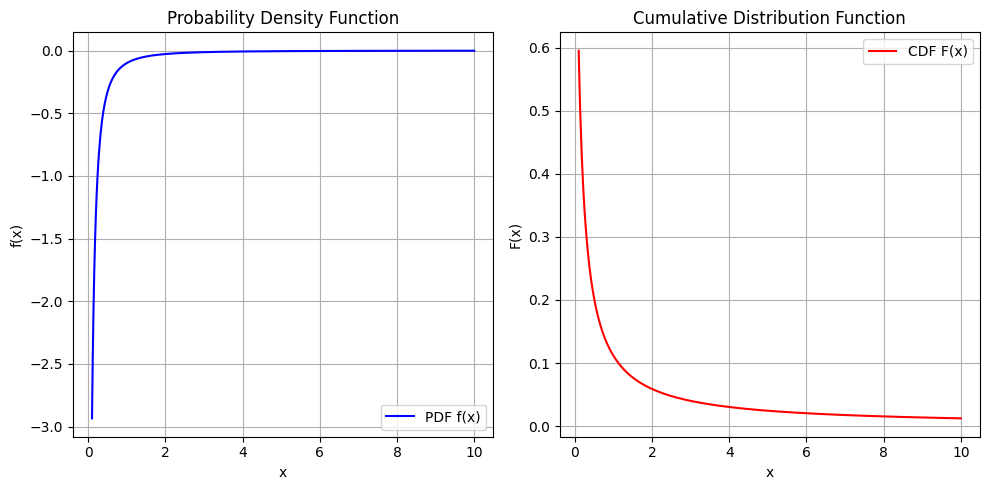

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import mpmath as mp

# Define variables
x = sp.symbols('x', positive=True)
alpha, beta, p = 0.5, 0.5, 0.5

# CDF expression
F_expr = 1 - sp.exp(1 - (1 + beta*x**(-1))**alpha) * (1 - p + p*(1 + beta*x**(-1))**alpha)

# PDF = derivative
f_expr = sp.diff(F_expr, x)

# Lambdify for numerical evaluation
F_num = sp.lambdify(x, F_expr, 'mpmath')
f_num = sp.lambdify(x, f_expr, 'mpmath')

# Numerical integral of PDF from 0 to ∞
integral_val = mp.quad(f_num, [0, mp.inf])
print("Integral of f(x) over [0, ∞) =", integral_val)

# Evaluate limits of CDF
F0 = sp.limit(F_expr, x, 0, dir='+')
F_inf = sp.limit(F_expr, x, sp.oo)
print("F(0+) =", F0)
print("F(∞) =", F_inf)
print("F(∞) - F(0+) =", F_inf - F0)

# Plot PDF and CDF
x_vals = np.linspace(0.1, 10, 500)
F_vals = [F_num(val) for val in x_vals]
f_vals = [f_num(val) for val in x_vals]

plt.figure(figsize=(10,5))

# PDF
plt.subplot(1,2,1)
plt.plot(x_vals, f_vals, label="PDF f(x)", color="blue")
plt.title("Probability Density Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()

# CDF
plt.subplot(1,2,2)
plt.plot(x_vals, F_vals, label="CDF F(x)", color="red")
plt.title("Cumulative Distribution Function")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


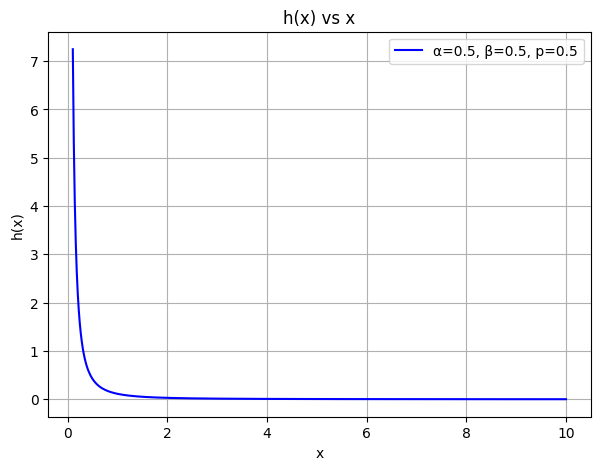

In [5]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define symbols
x = sp.symbols('x', positive=True)
alpha, beta, p = 0.5, 0.5, 0.5  # you can change these later

# Define h(x)
h_expr = (alpha*beta*x**(-2) * (1 + beta*x**(-1))**(alpha-1) *
          (1 - 2*p + p*(1 + beta*x**(-1))**alpha)) / \
         (1 - p + p*(1 + beta*x**(-1))**alpha)

# Lambdify
h_num = sp.lambdify(x, h_expr, 'numpy')

# Range of x
x_vals = np.linspace(0.1, 10, 500)
h_vals = h_num(x_vals)

# Plot
plt.figure(figsize=(7,5))
plt.plot(x_vals, h_vals, label=f"α={alpha}, β={beta}, p={p}", color="blue")
plt.title("h(x) vs x")
plt.xlabel("x")
plt.ylabel("h(x)")
plt.grid(True)
plt.legend()
plt.show()
